In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')

In [4]:
df

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3             0.1140        0.1550     10  
4             0.0395        0.0550      7  
...              ...           ...    ...  
4172          0.2390        0.2490     11  
4173          0.2145        0.2605     10  
4174          0.2875        0.3080      9  
4175          0.2610        0.2960     10  
4176          0.3765        0.4950     12  

[4177 rows x 9 columns]

In [5]:
#  checking shape of dataset
df.shape

(4177, 9)

In [6]:
# checking the  Nun_value

df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [7]:
# no nun_value in dataset

In [8]:
# 

df_1= pd.get_dummies(df,drop_first= True)

In [9]:
df_1.head(3)

Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   

   Shell weight  Rings  Sex_I  Sex_M  
0          0.15     15      0      1  
1          0.07      7      0      1  
2          0.21      9      0      0

In [10]:
# brief information of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [11]:
# statistical description
df.describe()

Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.000000  
50%          0.171000      0.234000     9.000000  
75%          0.253000      0.329000    11.000000  
max          0.760000      1.005000    29.000000

ANALYSIS THE DATA BY  VISULAIZATION

M    1528
I    1342
F    1307
Name: Sex, dtype: int64


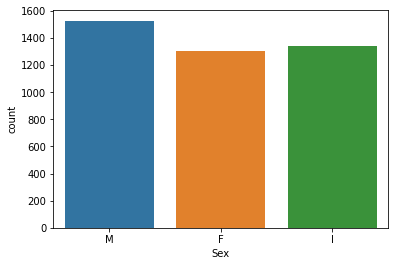

In [12]:
print(df['Sex'].value_counts())
sns.countplot(df['Sex'])
plt.show()

<AxesSubplot:xlabel='Rings', ylabel='count'>

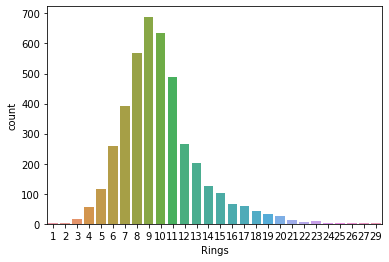

In [13]:
#
sns.countplot(df['Rings'])


<AxesSubplot:>

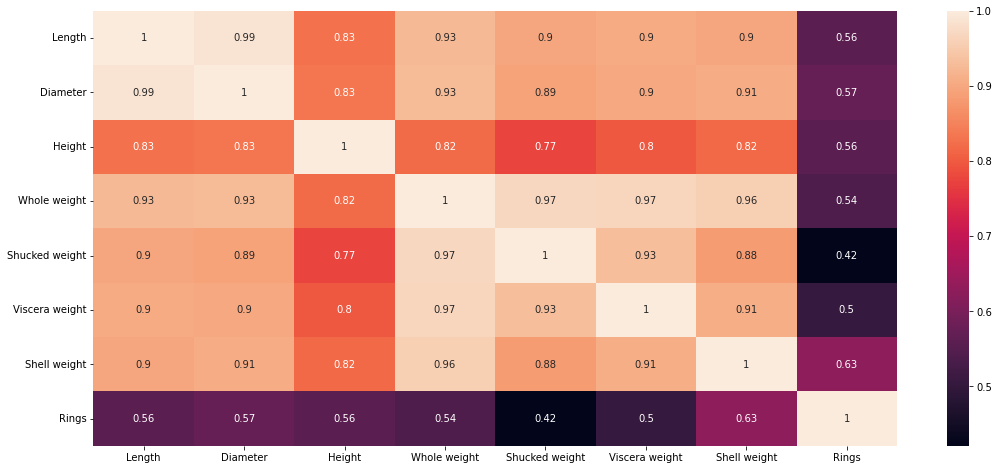

In [14]:
# plotting heatmap to check multicollinearity amongs features,
#   and also check how features are correlate to target variable

plt.figure(figsize=(18,8))
sns.heatmap(df.corr(), annot=True)

In [15]:
#  in this dataset all feature are high correlate each other 

In [16]:
# make sure these all feature are correlate through scatter plot

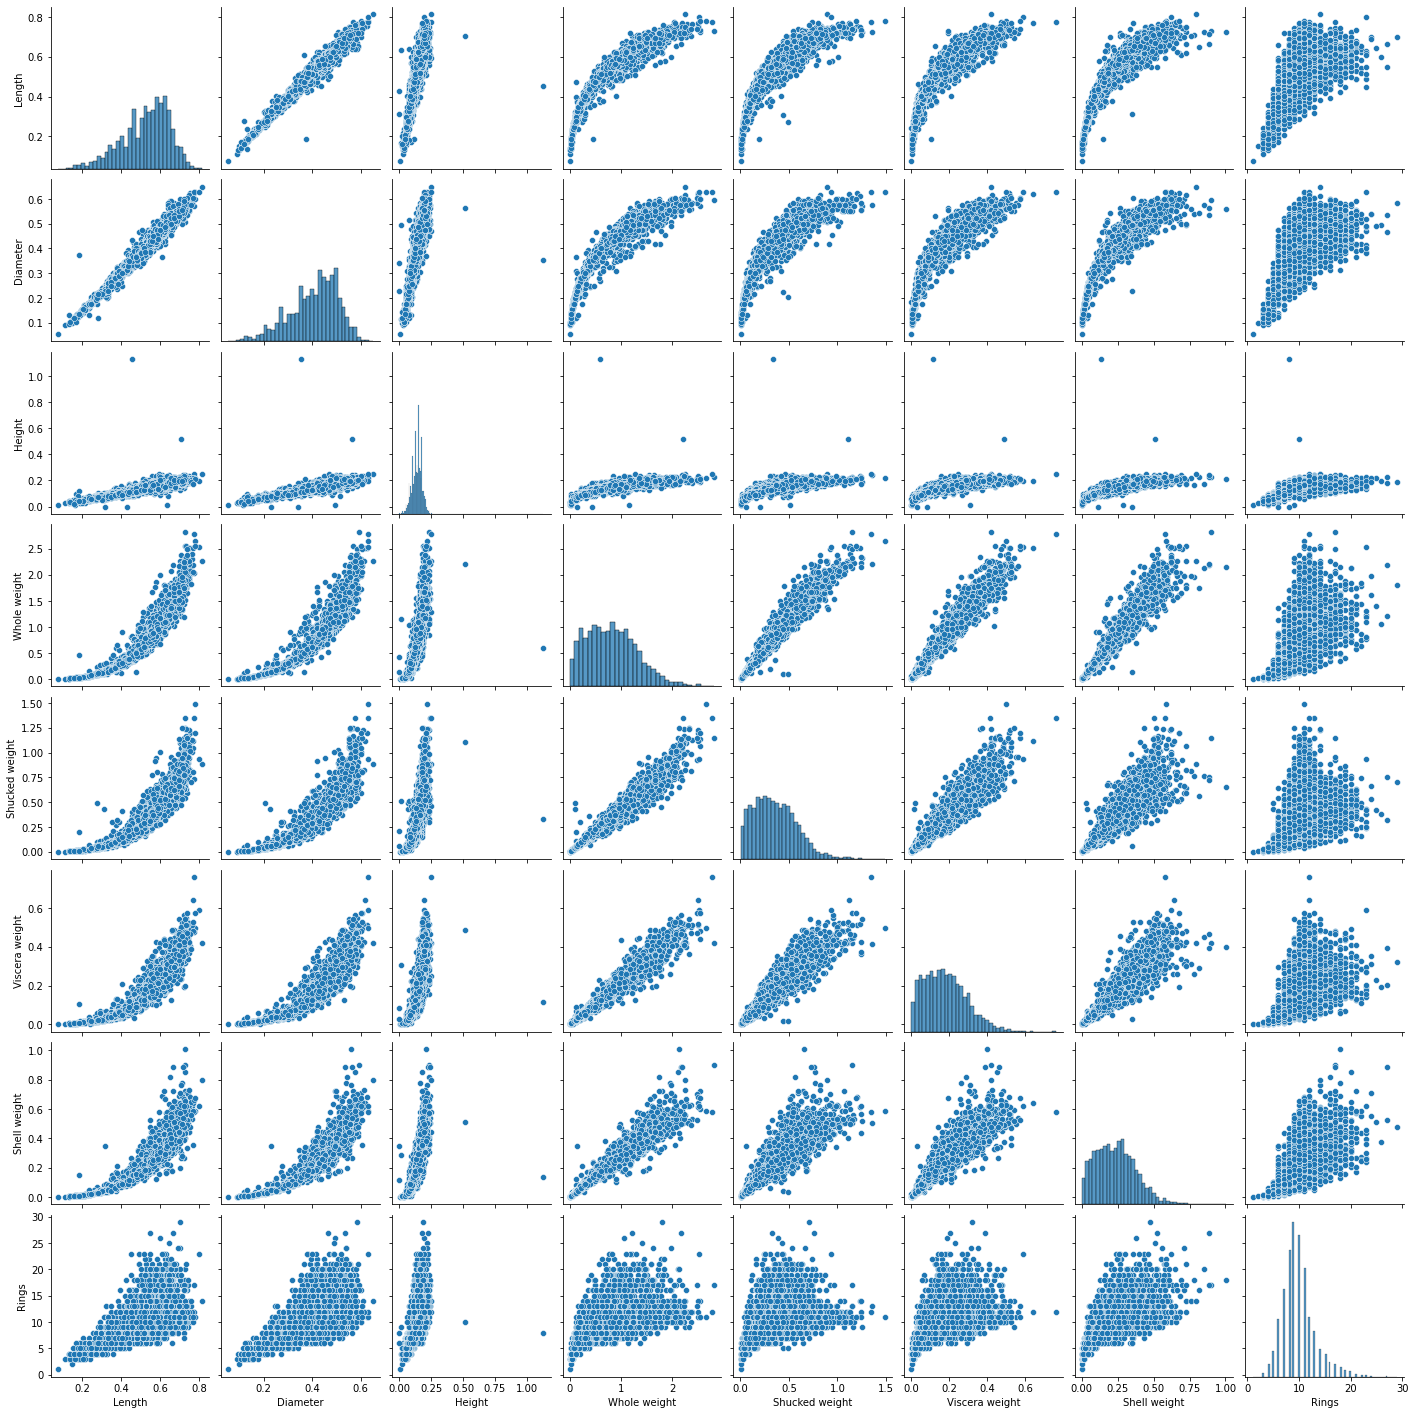

In [17]:
# we plot pairplot to see how features distrubtion relate ech other

sns.pairplot(df.drop('Sex',axis=1))

In [18]:
# in above pairplot, we see almost all feature are distributed positive correlation to each other

# in downside above pairplot we seen that data distribution between feature and 'Rings' ,minimum positive correlation show 

In [19]:
# coclusion 
#  we apply another method to check multicollinearity 'variance inflation factor' to check correlation

In [20]:
x= df.drop(['Sex','Rings'], axis=1)

In [21]:
# make sure to  use 'variance_inflation_factor' method to check  multicollinearity 

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif


features= x.columns
vif_value= [vif(x.values, i) for i in range(len(x.columns))]


In [22]:
pd.DataFrame({'features':features,'vif_value':vif_value})   #
                                                            #

features   vif_value
0          Length  695.083714
1        Diameter  748.879248
2          Height   42.117537
3    Whole weight  421.579746
4  Shucked weight  101.575906
5  Viscera weight   63.348265
6    Shell weight   81.772105

In [23]:
#   multicollinearity

#   'Length','Diameter','Whole weight','Shucked weight'  these features are highly correlated each other
#          and also show in heatmap
#  

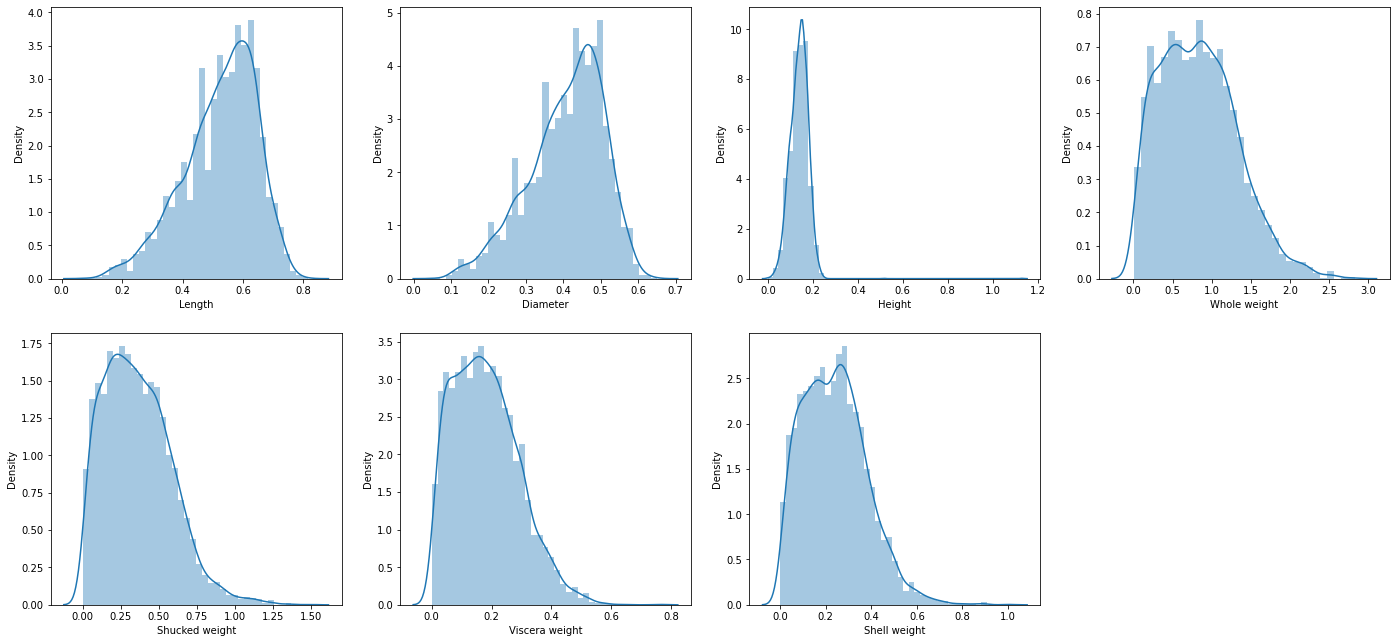

In [24]:
# plotting distplot plot to see how to features are distributed

plt.figure(figsize=(24,11))
p= 1

for col in x:
    if p<=9:                                          #  some features distribution show skewness
        ax=plt.subplot(2,4,p)           
        sns.distplot(x[col])                    
    p+=1
plt.show()

In [25]:
# we see in sns.displot 'Height' feature is very high skewed and
#  all features are less skewed except 'Height' column

In [26]:
skew= x.skew()
skew

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
dtype: float64

In [27]:
# removing skewness

x['Length']=  np.log1p(x['Length'])
x['Diameter']= np.log1p(x['Diameter'])
x['Shucked weight']= np.log1p(x['Shucked weight'])
x['Height']=  np.log1p(x['Height'])
x['Whole weight']= np.log1p(x['Whole weight'])
x['Viscera weight']= np.log1p(x['Viscera weight'])
x['Shell weight']= np.log1p(x['Shell weight'])


In [28]:
# checking again skewness

x.skew()

Length           -0.851674
Diameter         -0.787167
Height            1.099602
Whole weight     -0.038066
Shucked weight    0.306439
Viscera weight    0.375637
Shell weight      0.315321
dtype: float64

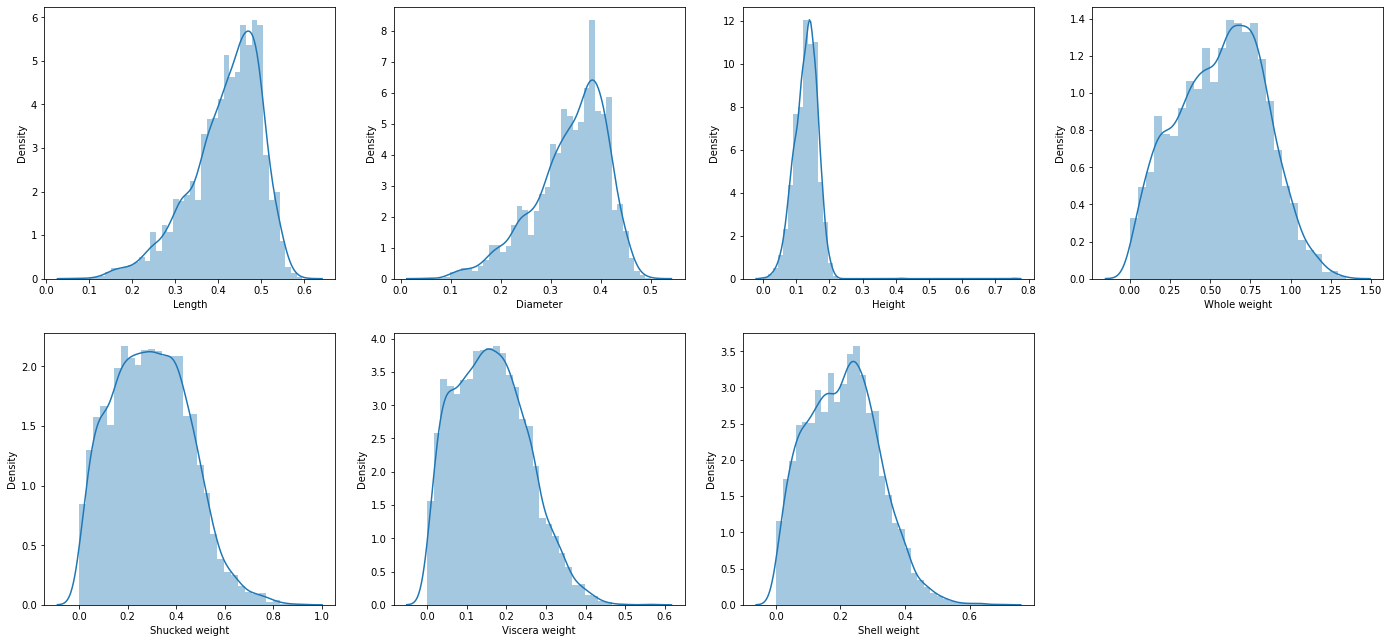

In [29]:
# plotting distplot after removed skewness of  feature 

plt.figure(figsize=(24,11))
p= 1

for col in x:
    if p<=7:                                      
        ax=plt.subplot(2,4,p)                          
        sns.distplot(x[col])
    p+=1
plt.show()

In [30]:

x['Sex_I']= df_1['Sex_I']
x['Sex_M']= df_1['Sex_M']

In [31]:
x.head(3)

Length  Diameter    Height  Whole weight  Shucked weight  Viscera weight  \
0  0.375006  0.311154  0.090754      0.414755        0.202533        0.096219   
1  0.300105  0.235072  0.086178      0.203349        0.094856        0.047361   
2  0.425268  0.350657  0.126633      0.517006        0.228330        0.132343   

   Shell weight  Sex_I  Sex_M  
0      0.139762      0      1  
1      0.067659      0      1  
2      0.190620      0      0

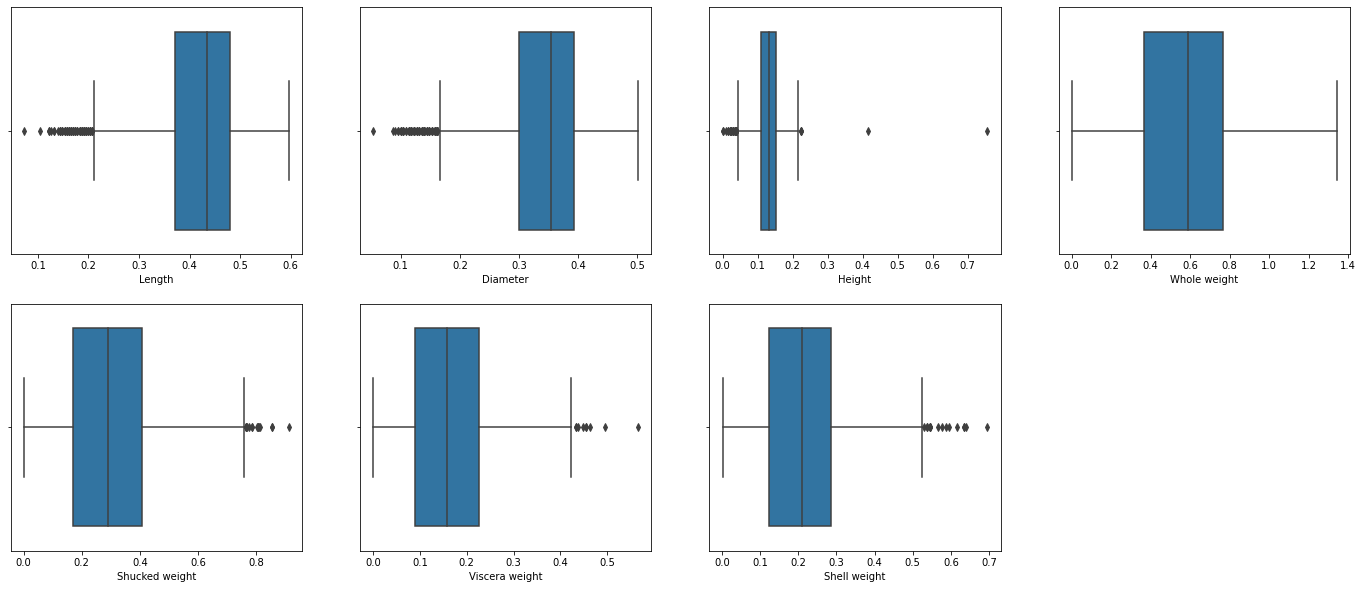

In [32]:
# let's plot BOXPLOT to check outliers

plt.figure(figsize=(24,10))
p= 1

for col in x:
    if p<=7:                                      
        ax=plt.subplot(2,4,p)                          
        sns.boxplot(x[col])
    p+=1
plt.show()

In [33]:
# in some columns have seen outliers

In [34]:
from scipy.stats import zscore

z_scores=zscore(x)
x_new= x.loc[(abs(z_scores)<3).all(axis=1)]


In [35]:
print('original_shape', x.shape)
print('shape after removing outliers', x_new.shape)

original_shape (4177, 9)
shape after removing outliers (4106, 9)


In [36]:
ind= x_new.index

In [37]:
ring=df_1['Rings'].loc[ind]
x_new['Rings']= ring

In [38]:
x_new.head(3)

Length  Diameter    Height  Whole weight  Shucked weight  Viscera weight  \
0  0.375006  0.311154  0.090754      0.414755        0.202533        0.096219   
1  0.300105  0.235072  0.086178      0.203349        0.094856        0.047361   
2  0.425268  0.350657  0.126633      0.517006        0.228330        0.132343   

   Shell weight  Sex_I  Sex_M  Rings  
0      0.139762      0      1     15  
1      0.067659      0      1      7  
2      0.190620      0      0      9

In [39]:
# INPUT FEATURES
X= x_new.drop('Rings', axis=1)

In [40]:
# target variable
y= x_new['Rings']

In [41]:
# import some important library

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

In [42]:
from sklearn.model_selection import cross_val_score as CVS

from sklearn.model_selection import KFold

In [43]:
sc= StandardScaler()

scaler= sc.fit_transform(X)

In [44]:
x_train,x_test,y_train,y_test= train_test_split(X,y, test_size= 25, random_state=459)

In [45]:
def model_score(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    pred= model.predict(x_train)
    y_pred= model.predict(x_test)
    print('training_score =', r2_score(y_train,pred))
    print('test_r2_score=', r2_score(y_test,y_pred))
    
    print('mse=', mse(y_test,y_pred))

    
kfold= KFold(n_splits=6)
def cross_val(model,x_train,y_train,algo):
    
    cv_score= CVS(model,x_train,y_train,cv= kfold,)
    print('cross_val_score with', algo,'=', cv_score.mean())

LET'S USE  LINEAR REGRESSION  MODEL

In [46]:

from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [47]:
model_score(lr,x_train,y_train,x_test,y_test)

training_score = 0.5439531141774023
test_r2_score= 0.6381592230937199
mse= 3.1054622837204584


MODEL FIT WITH  RANDOMFOREST REGRESSOR

In [48]:
# let's use RandomForestRegressor model

from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor(n_estimators=280,)

In [49]:
model_score(rf,x_train,y_train,x_test,y_test)

training_score = 0.9359639094942851
test_r2_score= 0.5956908490465536
mse= 3.469942857142858


LET'S TRY WITH SVM REGRESSION

In [50]:
from sklearn.svm import SVR

In [51]:
svm= SVR()

model_score(svm,x_train,y_train,x_test,y_test)

training_score = 0.492045862525604
test_r2_score= 0.733755782553007
mse= 2.2850143718170717


model fit with xgboost

In [52]:
import xgboost as xgb

xg= xgb.XGBRegressor()

In [53]:
xg.fit(x_train,y_train)

y_pred= xg.predict(x_test)

print('r2_score=', r2_score(y_test,y_pred))

r2_score= 0.5141344165165187


In [54]:
# cross_val_score  with svm

cross_val(svm,x_train, y_train, 'svm regressor')

cross_val_score with svm regressor = 0.47975871752637883


In [55]:
# cross_val_score  with LinearRegression

cross_val(lr,x_train, y_train, 'linear regression')

cross_val_score with linear regression = 0.5403596369598594


In [56]:
# CROSS VAL SCORE KNN

from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

cross_val(knn,x_train, y_train, 'knn regressor')

cross_val_score with knn regressor = 0.5047497417067681


APPLY  HYPER TUNING  WITH  RANDOMIZEDSEARCHCV

In [57]:
# Make gridsearch function
from sklearn.model_selection import RandomizedSearchCV

#from sklearn.model_selection import GridSearchCV

x_train,x_test,y_train,y_test= train_test_split(scaler,y, test_size= 0.25, random_state=457)

def randomizedsearch(model,param,x_train,y_train,x_test,y_test,data):
    grid= RandomizedSearchCV(model, param_distributions=param, cv=5, n_jobs=-1)
    grid.fit(x_train,y_train)
    
    cls= grid.best_estimator_
    cls.fit(x_train,y_train)
    pred= cls.predict(x_test)
    
    print(data, 'with gridsearchcv')
    print('r2_score =', r2_score(y_test, pred))
    print('mse= ', mse(y_test,pred))
    

In [65]:
#  use GridSearchCV with AdaBoost_regressor

from sklearn.ensemble import AdaBoostRegressor

adaboost= AdaBoostRegressor()

parameter = {'n_estimators':[280,500],'learning_rate':[1.0,0.1,0.01,0.29]}

randomizedsearch(adaboost, parameter, x_train,y_train,x_test,y_test,'AdaBoost_regressor')

AdaBoost_regressor with gridsearchcv
r2_score = 0.4868311924968295
mse=  5.205081798229075


In [67]:
#  use RandomizedSearchCV with randomforest

rf_r= RandomForestRegressor()

grid = {'n_estimators':[280,500],'max_depth':[2,3,5],'min_samples_split':[2,3,4]}

randomizedsearch(rf_r, grid, x_train,y_train,x_test,y_test,'randomforest_regressor')

randomforest_regressor with gridsearchcv
r2_score = 0.5386196568860802
mse=  4.679790335830402


In [68]:
#  SAVE THE MODEL 

import pickle

In [69]:

from sklearn.ensemble import RandomForestRegressor

rf_= RandomForestRegressor(n_estimators=200)
rf_.fit(x_train,y_train)



rf_model= 'finalmodel.sav'

pickle.dump(rf_, open(rf_model, 'wb'))


In [80]:
# load the model 
model = pickle.load(open(rf_model, 'rb'))

predict= model.predict(x_test)

r2_score(y_test, predict)


0.5428836102576916